#  Quantum Threat Visualizations

## Data-Driven Risk Assessment for Cryptographic Migration

---

### [!] DISCLAIMER ON PROJECTIONS

> **IMPORTANT: All timelines in this notebook are SCENARIO-BASED ESTIMATES.**
>
> - There is **no scientific consensus** on when cryptographically relevant quantum computers (CRQCs) will exist
> - Expert opinions range from "never" to "within 10 years"
> - These visualizations are tools for **risk management**, not predictions
> - The purpose is to help organizations make **informed decisions** about migration timing

---

###  Learning Objectives

After completing this notebook, you will understand:

1. The **"Harvest Now, Decrypt Later" (HNDL)** threat model
2. **Mosca's Theorem** for cryptographic risk assessment
3. The difference between **symmetric** (AES) and **asymmetric** (RSA) quantum vulnerability
4. How to interpret **qubit progress** data in context
5. Why migration should begin **now** despite uncertain timelines

---

## Part 1: The Harvest Now, Decrypt Later (HNDL) Threat

### 1.1 Understanding the Threat Model

The HNDL attack is deceptively simple:

```
┌─────────────────────────────────────────────────────────────────────────┐
│                    HARVEST NOW, DECRYPT LATER                            │
├─────────────────────────────────────────────────────────────────────────┤
│                                                                          │
│   TODAY (2024)                         FUTURE (202X?)                    │
│   ───────────                          ────────────────                  │
│                                                                          │
│   ┌─────────────┐      Store       ┌─────────────────┐                  │
│   │ Encrypted   │ ───────────────► │ Encrypted Data  │                  │
│   │ Traffic     │                  │ Archive         │                  │
│   └─────────────┘                  └────────┬────────┘                  │
│         │                                   │                            │
│         │ Intercepted by                    │ Quantum                    │
│         │ adversary                         │ Computer                   │
│         │                                   ▼                            │
│         │                          ┌─────────────────┐                  │
│         │                          │ Decrypted Data! │                  │
│         │                          │ • State secrets │                  │
│         │                          │ • Medical records│                  │
│         │                          │ • Financial data │                  │
│         │                          └─────────────────┘                  │
│                                                                          │
│   RSA-2048 encryption               Shor's Algorithm                    │
│   is secure TODAY                   breaks it in HOURS                  │
│                                                                          │
└─────────────────────────────────────────────────────────────────────────┘
```

### 1.2 Why This Matters Now

| Data Type | Required Secrecy Period | At Risk Today? |
|-----------|------------------------|----------------|
| Classified government intelligence | 50+ years | [!] **YES** |
| Medical records | 30-80 years (patient lifetime) | [!] **YES** |
| Financial transactions | 7-25 years | [!] **Possibly** |
| Corporate trade secrets | 10-50 years | [!] **YES** |
| Personal communications | 10-30 years | [!] **Possibly** |

**Key Insight:** If your secrets need to remain secret for longer than the time until quantum computers arrive, you are **already at risk**.

In [1]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.patches import FancyBboxPatch
import warnings
warnings.filterwarnings('ignore')

# Set up plotting
%matplotlib inline

# Use a clean style
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams['axes.facecolor'] = 'white'
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.size'] = 11

# Color palette
COLORS = {
    'critical': '#e74c3c',
    'warning': '#f39c12',
    'safe': '#27ae60',
    'info': '#3498db',
    'dark': '#2c3e50',
    'light': '#ecf0f1'
}

print("[OK] Visualization environment ready!")

[OK] Visualization environment ready!


---

## Part 2: Mosca's Theorem — The Risk Inequality

### 2.1 Mathematical Foundation

[Michele Mosca](https://globalriskinstitute.org/publication/quantum-threat-timeline-report-2022/) formalized the quantum cryptographic risk with a simple inequality:

$$\boxed{X + Y > Z \implies \text{Immediate Action Required}}$$

Where:

| Variable | Definition | Typical Range |
|----------|------------|---------------|
| $X$ | **Shelf Life** — How long must the data remain secret? | 5-50+ years |
| $Y$ | **Migration Time** — How long to migrate systems to PQC? | 2-15 years |
| $Z$ | **Collapse Time** — When will CRQCs exist? | Unknown (5-30+ years) |

### 2.2 The Logic

- If $(X + Y) > Z$: Your secrets will be exposed before you finish migrating. **ACT NOW.**
- If $(X + Y) \leq Z$: You have time, but should still monitor and plan.

### 2.3 Why Uncertainty Favors Early Action

Since $Z$ is **unknown**, organizations must consider:
- Worst-case scenario: $Z$ could be 5-10 years (optimistic quantum progress)
- Large systems ($Y = 10-15$ years) have no margin for error

MOSCA'S THEOREM: QUANTUM RISK ASSESSMENT


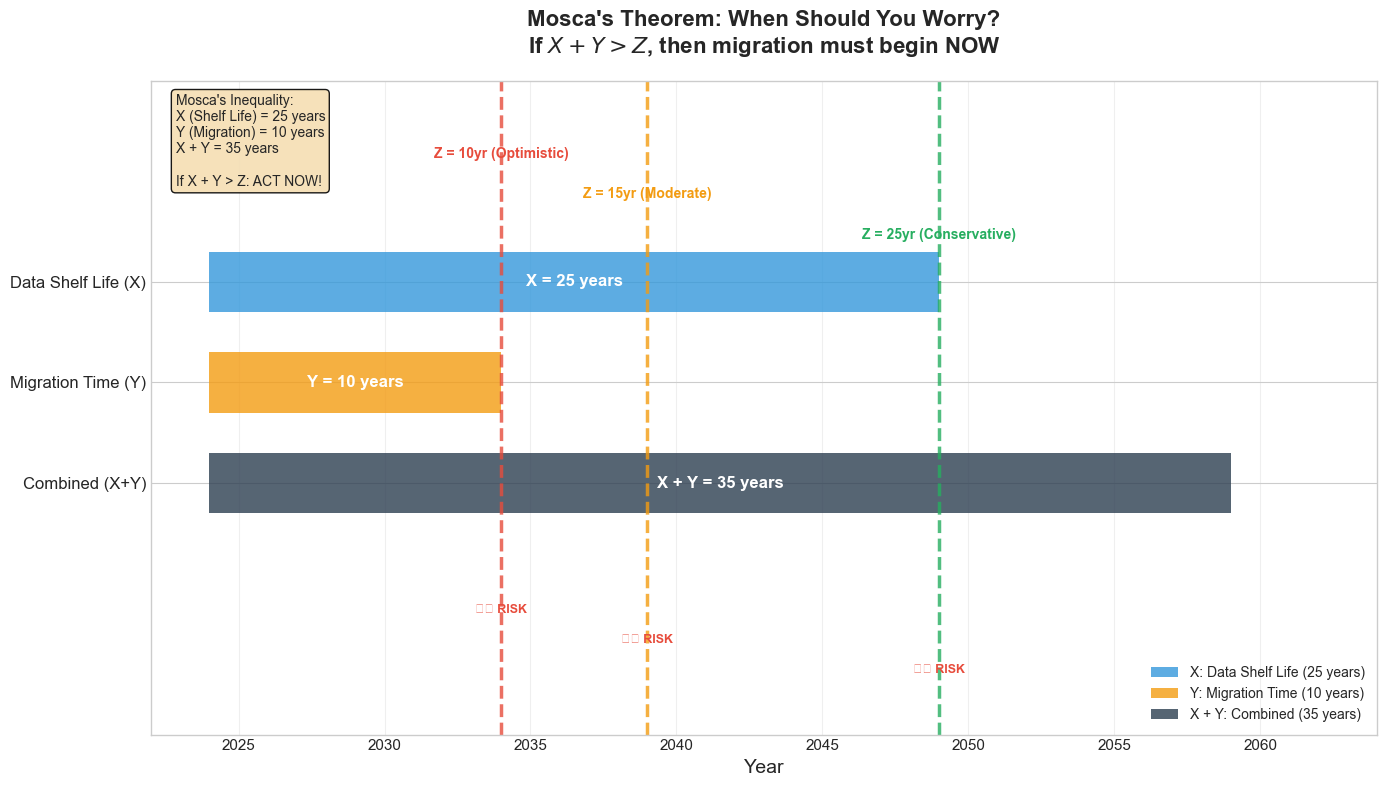


MOSCA'S THEOREM RISK ANALYSIS

Your combined timeline: X + Y = 35 years

Scenario Analysis:
  Optimistic (Z=10): [!]  CRITICAL - Start migration immediately!
  Moderate (Z=15): [!]  CRITICAL - Start migration immediately!
  Conservative (Z=25): [!]  CRITICAL - Start migration immediately!


In [2]:
def visualize_mosca_theorem(shelf_life, migration_time, collapse_scenarios):
    """
    Visualize Mosca's Theorem: X + Y > Z inequality.
    
    Args:
        shelf_life: X - How long data must remain secret (years)
        migration_time: Y - Time to migrate to PQC (years)
        collapse_scenarios: dict of {name: Z value} for different scenarios
    """
    fig, ax = plt.subplots(figsize=(14, 8))
    
    current_year = 2024
    combined_time = shelf_life + migration_time
    
    # Y positions for bars
    y_positions = {
        'shelf_life': 4,
        'migration': 3,
        'combined': 2
    }
    
    bar_height = 0.6
    
    # Draw Shelf Life bar (X)
    ax.barh(y_positions['shelf_life'], shelf_life, height=bar_height, 
            left=current_year, color=COLORS['info'], alpha=0.8,
            label=f'X: Data Shelf Life ({shelf_life} years)')
    ax.text(current_year + shelf_life/2, y_positions['shelf_life'], 
            f'X = {shelf_life} years', ha='center', va='center', 
            fontsize=12, fontweight='bold', color='white')
    
    # Draw Migration Time bar (Y)
    ax.barh(y_positions['migration'], migration_time, height=bar_height,
            left=current_year, color=COLORS['warning'], alpha=0.8,
            label=f'Y: Migration Time ({migration_time} years)')
    ax.text(current_year + migration_time/2, y_positions['migration'],
            f'Y = {migration_time} years', ha='center', va='center',
            fontsize=12, fontweight='bold', color='white')
    
    # Draw Combined bar (X + Y)
    ax.barh(y_positions['combined'], combined_time, height=bar_height,
            left=current_year, color=COLORS['dark'], alpha=0.8,
            label=f'X + Y: Combined ({combined_time} years)')
    ax.text(current_year + combined_time/2, y_positions['combined'],
            f'X + Y = {combined_time} years', ha='center', va='center',
            fontsize=12, fontweight='bold', color='white')
    
    # Draw collapse scenario lines (Z)
    scenario_y = 0.8
    scenario_colors = {'Optimistic': COLORS['critical'], 
                       'Moderate': COLORS['warning'], 
                       'Conservative': COLORS['safe']}
    
    for i, (name, z_value) in enumerate(collapse_scenarios.items()):
        year = current_year + z_value
        color = scenario_colors.get(name, COLORS['info'])
        
        # Vertical line for Z
        ax.axvline(x=year, color=color, linestyle='--', linewidth=2.5, alpha=0.8)
        
        # Label
        ax.text(year, 5.2 - i*0.4, f'Z = {z_value}yr ({name})', 
                ha='center', va='bottom', fontsize=10, color=color, fontweight='bold')
        
        # Risk status
        if combined_time > z_value:
            status = "[!] RISK"
            status_color = COLORS['critical']
        else:
            status = "[OK] OK"
            status_color = COLORS['safe']
        
        ax.text(year, scenario_y - i*0.3, status, 
                ha='center', va='top', fontsize=9, color=status_color, fontweight='bold')
    
    # Formatting
    ax.set_xlim(current_year - 2, current_year + max(combined_time, max(collapse_scenarios.values())) + 5)
    ax.set_ylim(-0.5, 6)
    ax.set_xlabel('Year', fontsize=14)
    ax.set_yticks([y_positions['shelf_life'], y_positions['migration'], y_positions['combined']])
    ax.set_yticklabels(['Data Shelf Life (X)', 'Migration Time (Y)', 'Combined (X+Y)'], fontsize=12)
    ax.set_title("Mosca's Theorem: When Should You Worry?\n" + 
                 r"If $X + Y > Z$, then migration must begin NOW", 
                 fontsize=16, fontweight='bold', pad=20)
    
    # Add legend
    ax.legend(loc='lower right', fontsize=10)
    
    # Add grid
    ax.grid(True, alpha=0.3, axis='x')
    
    # Add annotation box
    textstr = ('Mosca\'s Inequality:\n'
               f'X (Shelf Life) = {shelf_life} years\n'
               f'Y (Migration) = {migration_time} years\n'
               f'X + Y = {combined_time} years\n\n'
               'If X + Y > Z: ACT NOW!')
    props = dict(boxstyle='round', facecolor='wheat', alpha=0.9)
    ax.text(0.02, 0.98, textstr, transform=ax.transAxes, fontsize=10,
            verticalalignment='top', bbox=props)
    
    plt.tight_layout()
    plt.show()
    
    # Print analysis
    print("\n" + "="*60)
    print("MOSCA'S THEOREM RISK ANALYSIS")
    print("="*60)
    print(f"\nYour combined timeline: X + Y = {combined_time} years")
    print(f"\nScenario Analysis:")
    for name, z in collapse_scenarios.items():
        if combined_time > z:
            print(f"  {name} (Z={z}): [!]  CRITICAL - Start migration immediately!")
        else:
            margin = z - combined_time
            print(f"  {name} (Z={z}): [OK] Safe with {margin} year margin")


# =============================================================================
# MOSCA'S THEOREM VISUALIZATION
# =============================================================================

print("="*60)
print("MOSCA'S THEOREM: QUANTUM RISK ASSESSMENT")
print("="*60)

#  INTERACTIVE: Adjust these parameters for your organization!
SHELF_LIFE = 25        # X: How long must your secrets remain secret? (years)
MIGRATION_TIME = 10    # Y: How long will migration take? (years)

# Collapse time scenarios (Z)
COLLAPSE_SCENARIOS = {
    'Optimistic': 10,     # Aggressive quantum progress
    'Moderate': 15,       # Steady progress
    'Conservative': 25    # Significant technical hurdles
}

visualize_mosca_theorem(SHELF_LIFE, MIGRATION_TIME, COLLAPSE_SCENARIOS)

---

## Part 3: Symmetric vs Asymmetric Vulnerability

### 3.1 The Critical Distinction

Not all cryptography is equally vulnerable to quantum attacks:

| Algorithm Type | Quantum Attack | Impact | Solution |
|---------------|----------------|--------|----------|
| **Asymmetric** (RSA, ECC, DH) | Shor's Algorithm |  **Catastrophic** — Broken completely | Replace with PQC |
| **Symmetric** (AES) | Grover's Algorithm | [!] **Degraded** — Security halved | Double key size |
| **Hash Functions** (SHA-256) | Grover's Algorithm | [!] **Degraded** — Collision resistance reduced | Use longer hashes |

### 3.2 Mathematical Explanation

**Grover's Algorithm (Symmetric):**
- Provides quadratic speedup for unstructured search
- Reduces $2^n$ search to $2^{n/2}$ operations
- AES-128: $2^{128} \rightarrow 2^{64}$ (weak)
- AES-256: $2^{256} \rightarrow 2^{128}$ (still strong)

**Shor's Algorithm (Asymmetric):**
- Solves discrete log and factoring in polynomial time
- RSA-2048: $2^{112}$ (classical) $\rightarrow$ **polynomial** (broken)
- No amount of key size increase will help!

SYMMETRIC vs ASYMMETRIC QUANTUM VULNERABILITY


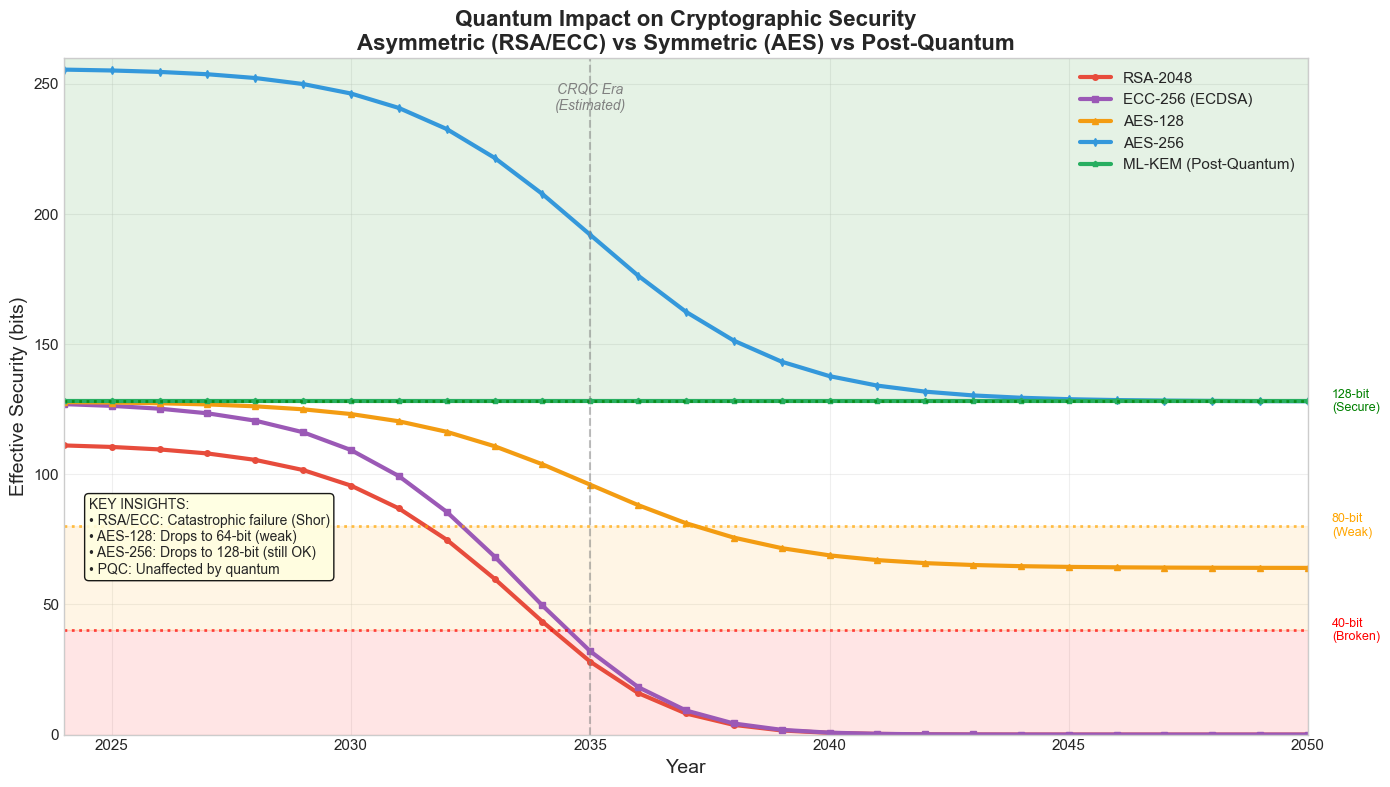


SECURITY DEGRADATION SUMMARY

┌─────────────────┬───────────────┬───────────────┬──────────────┐
│ Algorithm       │ Classical     │ Post-Quantum  │ Action       │
├─────────────────┼───────────────┼───────────────┼──────────────┤
│ RSA-2048        │ 112 bits      │ ~0 bits       │ REPLACE      │
│ ECC-256         │ 128 bits      │ ~0 bits       │ REPLACE      │
│ AES-128         │ 128 bits      │ 64 bits       │ UPGRADE      │
│ AES-256         │ 256 bits      │ 128 bits      │ ACCEPTABLE   │
│ ML-KEM (Kyber)  │ 128 bits      │ 128 bits      │ RECOMMENDED  │
└─────────────────┴───────────────┴───────────────┴──────────────┘


In [3]:
def visualize_security_degradation():
    """
    Visualize how quantum computers affect different cryptographic algorithms.
    
    Shows the 'effective security bits' over time as quantum capabilities grow.
    """
    fig, ax = plt.subplots(figsize=(14, 8))
    
    # Timeline
    years = np.arange(2024, 2051)
    
    # Model quantum capability growth (simplified S-curve)
    # This represents "effective quantum threat level" from 0 to 1
    def quantum_threat(year, midpoint=2035, steepness=0.5):
        """Sigmoid function for quantum capability growth."""
        return 1 / (1 + np.exp(-steepness * (year - midpoint)))
    
    threat_level = quantum_threat(years)
    
    # Security levels (bits)
    # RSA-2048: ~112 bits classical, drops to near 0 when CRQC exists
    rsa_2048_classical = 112
    rsa_2048 = rsa_2048_classical * (1 - threat_level) ** 2  # Catastrophic drop
    
    # ECC-256: ~128 bits classical, same catastrophic failure
    ecc_256_classical = 128
    ecc_256 = ecc_256_classical * (1 - threat_level) ** 2
    
    # AES-128: 128 bits classical, halved to 64 by Grover
    aes_128_classical = 128
    aes_128 = aes_128_classical - (64 * threat_level)  # Gradual reduction to 64
    
    # AES-256: 256 bits classical, halved to 128 by Grover (still secure)
    aes_256_classical = 256
    aes_256 = aes_256_classical - (128 * threat_level)  # Gradual reduction to 128
    
    # ML-KEM (Kyber) - quantum resistant, stays constant
    ml_kem = np.full_like(years, 128, dtype=float)
    
    # Plot all algorithms
    ax.plot(years, rsa_2048, 'o-', label='RSA-2048', color=COLORS['critical'], 
            linewidth=3, markersize=4)
    ax.plot(years, ecc_256, 's-', label='ECC-256 (ECDSA)', color='#9b59b6', 
            linewidth=3, markersize=4)
    ax.plot(years, aes_128, '^-', label='AES-128', color=COLORS['warning'], 
            linewidth=3, markersize=4)
    ax.plot(years, aes_256, 'd-', label='AES-256', color=COLORS['info'], 
            linewidth=3, markersize=4)
    ax.plot(years, ml_kem, 'p-', label='ML-KEM (Post-Quantum)', color=COLORS['safe'], 
            linewidth=3, markersize=4)
    
    # Security threshold lines
    ax.axhline(y=128, color='green', linestyle=':', alpha=0.7, linewidth=2)
    ax.text(2050.5, 128, '128-bit\n(Secure)', va='center', fontsize=9, color='green')
    
    ax.axhline(y=80, color='orange', linestyle=':', alpha=0.7, linewidth=2)
    ax.text(2050.5, 80, '80-bit\n(Weak)', va='center', fontsize=9, color='orange')
    
    ax.axhline(y=40, color='red', linestyle=':', alpha=0.7, linewidth=2)
    ax.text(2050.5, 40, '40-bit\n(Broken)', va='center', fontsize=9, color='red')
    
    # Add shaded regions
    ax.fill_between(years, 0, 40, alpha=0.1, color='red', label='_Broken Zone')
    ax.fill_between(years, 40, 80, alpha=0.1, color='orange', label='_Weak Zone')
    ax.fill_between(years, 128, 260, alpha=0.1, color='green', label='_Secure Zone')
    
    # Mark the "danger zone"
    danger_year = 2035
    ax.axvline(x=danger_year, color='gray', linestyle='--', alpha=0.5)
    ax.text(danger_year, 240, 'CRQC Era\n(Estimated)', ha='center', fontsize=10, 
            style='italic', color='gray')
    
    # Formatting
    ax.set_xlim(2024, 2050)
    ax.set_ylim(0, 260)
    ax.set_xlabel('Year', fontsize=14)
    ax.set_ylabel('Effective Security (bits)', fontsize=14)
    ax.set_title('Quantum Impact on Cryptographic Security\n' +
                 'Asymmetric (RSA/ECC) vs Symmetric (AES) vs Post-Quantum', 
                 fontsize=16, fontweight='bold')
    ax.legend(loc='upper right', fontsize=11)
    ax.grid(True, alpha=0.3)
    
    # Add insight box
    insight = ('KEY INSIGHTS:\n'
               '• RSA/ECC: Catastrophic failure (Shor)\n'
               '• AES-128: Drops to 64-bit (weak)\n'
               '• AES-256: Drops to 128-bit (still OK)\n'
               '• PQC: Unaffected by quantum')
    props = dict(boxstyle='round', facecolor='lightyellow', alpha=0.9)
    ax.text(0.02, 0.35, insight, transform=ax.transAxes, fontsize=10,
            verticalalignment='top', bbox=props)
    
    plt.tight_layout()
    plt.show()
    
    # Print summary
    print("\n" + "="*60)
    print("SECURITY DEGRADATION SUMMARY")
    print("="*60)
    print("\n┌─────────────────┬───────────────┬───────────────┬──────────────┐")
    print("│ Algorithm       │ Classical     │ Post-Quantum  │ Action       │")
    print("├─────────────────┼───────────────┼───────────────┼──────────────┤")
    print("│ RSA-2048        │ 112 bits      │ ~0 bits       │ REPLACE      │")
    print("│ ECC-256         │ 128 bits      │ ~0 bits       │ REPLACE      │")
    print("│ AES-128         │ 128 bits      │ 64 bits       │ UPGRADE      │")
    print("│ AES-256         │ 256 bits      │ 128 bits      │ ACCEPTABLE   │")
    print("│ ML-KEM (Kyber)  │ 128 bits      │ 128 bits      │ RECOMMENDED  │")
    print("└─────────────────┴───────────────┴───────────────┴──────────────┘")


# =============================================================================
# SECURITY DEGRADATION VISUALIZATION
# =============================================================================

print("="*60)
print("SYMMETRIC vs ASYMMETRIC QUANTUM VULNERABILITY")
print("="*60)

visualize_security_degradation()

---

## Part 4: Qubit Progress — Reality Check

### 4.1 Understanding Qubit Counts

Media headlines often tout "1000 qubit" quantum computers. But context matters:

| Metric | Definition | Current State (2024) | Needed for RSA-2048 |
|--------|------------|---------------------|---------------------|
| **Physical Qubits** | Actual hardware qubits | ~1,000-1,500 | ~20 million* |
| **Logical Qubits** | Error-corrected qubits | ~10-50 | ~4,000-6,000 |
| **Gate Fidelity** | Accuracy of operations | ~99-99.9% | >99.9% sustained |
| **Coherence Time** | How long qubits stay quantum | ~100 microseconds | Hours |

*Gidney & Ekerå (2021): "How to factor 2048 bit RSA integers in 8 hours using 20 million noisy qubits"

### 4.2 The Gap is Enormous

Current quantum computers are **~4 orders of magnitude** (10,000x) away from breaking RSA-2048.

However:
- Progress has been exponential in some periods
- Multiple hardware approaches are advancing
- Error correction is improving

The prudent approach is to **prepare for uncertainty**, not assume safety.

QUANTUM COMPUTING PROGRESS: A REALITY CHECK


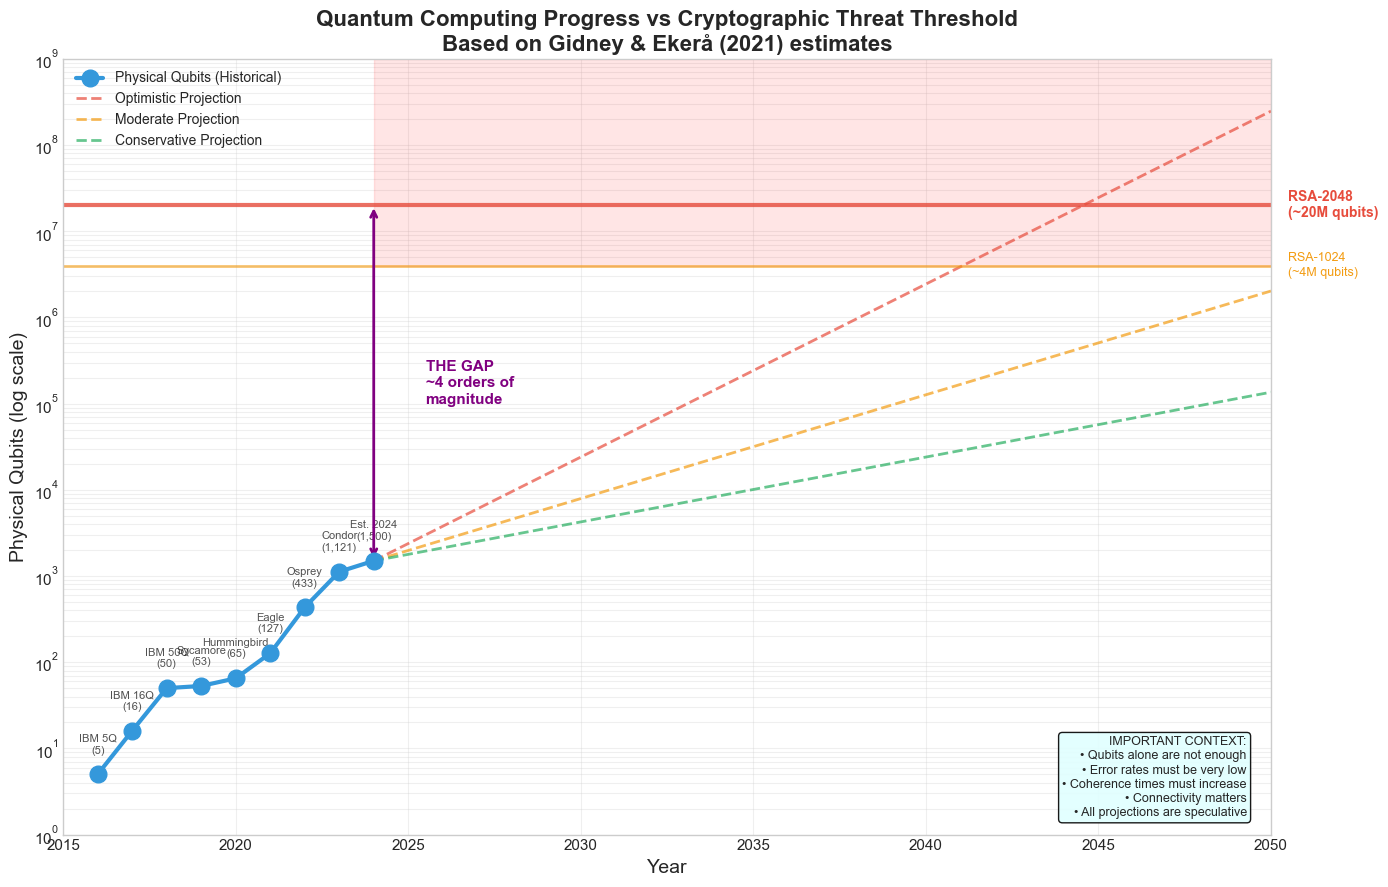


TIMELINE ANALYSIS (Highly Speculative)

Optimistic (doubling every 1.5 years):
  RSA-2048 threatened by: ~2045

Moderate: RSA-2048 not threatened before 2050

Conservative: RSA-2048 not threatened before 2050

[!]  These projections are for ILLUSTRATION ONLY!
   Real timelines depend on breakthroughs that cannot be predicted.


In [4]:
def visualize_qubit_progress():
    """
    Visualize historical qubit progress and the gap to cryptographic relevance.
    
    Uses logarithmic scale to show the massive gap.
    """
    fig, ax = plt.subplots(figsize=(14, 9))
    
    # Historical data (approximate, based on public announcements)
    # Format: (year, qubits, label, company)
    historical_data = [
        (2016, 5, 'IBM 5Q', 'IBM'),
        (2017, 16, 'IBM 16Q', 'IBM'),
        (2018, 50, 'IBM 50Q', 'IBM'),
        (2019, 53, 'Sycamore', 'Google'),
        (2020, 65, 'Hummingbird', 'IBM'),
        (2021, 127, 'Eagle', 'IBM'),
        (2022, 433, 'Osprey', 'IBM'),
        (2023, 1121, 'Condor', 'IBM'),
        (2024, 1500, 'Est. 2024', 'Various'),
    ]
    
    years = [d[0] for d in historical_data]
    qubits = [d[1] for d in historical_data]
    labels = [d[2] for d in historical_data]
    
    # Plot historical progress
    ax.semilogy(years, qubits, 'o-', color=COLORS['info'], linewidth=3, 
                markersize=12, label='Physical Qubits (Historical)', zorder=5)
    
    # Add labels for each point
    for year, qubit, label in zip(years, qubits, labels):
        ax.annotate(f'{label}\n({qubit:,})', (year, qubit), 
                   textcoords='offset points', xytext=(0, 15),
                   ha='center', fontsize=8, alpha=0.8)
    
    # Project future scenarios
    future_years = np.arange(2024, 2051)
    
    # Scenario 1: Optimistic (doubling every 1.5 years)
    optimistic = 1500 * (2 ** ((future_years - 2024) / 1.5))
    ax.semilogy(future_years, optimistic, '--', color=COLORS['critical'], 
                linewidth=2, alpha=0.7, label='Optimistic Projection')
    
    # Scenario 2: Moderate (doubling every 2.5 years)
    moderate = 1500 * (2 ** ((future_years - 2024) / 2.5))
    ax.semilogy(future_years, moderate, '--', color=COLORS['warning'], 
                linewidth=2, alpha=0.7, label='Moderate Projection')
    
    # Scenario 3: Conservative (doubling every 4 years)
    conservative = 1500 * (2 ** ((future_years - 2024) / 4))
    ax.semilogy(future_years, conservative, '--', color=COLORS['safe'], 
                linewidth=2, alpha=0.7, label='Conservative Projection')
    
    # Critical thresholds
    # Logical qubits needed (assuming 1000:1 physical to logical ratio with error correction)
    rsa_2048_physical = 20_000_000  # Gidney & Ekerå estimate
    rsa_1024_physical = 4_000_000   # Rough estimate
    
    ax.axhline(y=rsa_2048_physical, color=COLORS['critical'], linestyle='-', 
               linewidth=3, alpha=0.8)
    ax.text(2050.5, rsa_2048_physical, 'RSA-2048\n(~20M qubits)', 
            va='center', fontsize=10, color=COLORS['critical'], fontweight='bold')
    
    ax.axhline(y=rsa_1024_physical, color=COLORS['warning'], linestyle='-', 
               linewidth=2, alpha=0.6)
    ax.text(2050.5, rsa_1024_physical, 'RSA-1024\n(~4M qubits)', 
            va='center', fontsize=9, color=COLORS['warning'])
    
    # Shade the "danger zone"
    ax.fill_between(future_years, rsa_1024_physical, 1e9, alpha=0.1, color='red')
    
    # Add "The Gap" annotation
    ax.annotate('', xy=(2024, rsa_2048_physical), xytext=(2024, 1500),
                arrowprops=dict(arrowstyle='<->', color='purple', lw=2))
    ax.text(2025.5, 100000, 'THE GAP\n~4 orders of\nmagnitude', 
            fontsize=11, color='purple', fontweight='bold', ha='left')
    
    # Formatting
    ax.set_xlim(2015, 2050)
    ax.set_ylim(1, 1e9)
    ax.set_xlabel('Year', fontsize=14)
    ax.set_ylabel('Physical Qubits (log scale)', fontsize=14)
    ax.set_title('Quantum Computing Progress vs Cryptographic Threat Threshold\n' +
                 'Based on Gidney & Ekerå (2021) estimates', 
                 fontsize=16, fontweight='bold')
    ax.legend(loc='upper left', fontsize=10)
    ax.grid(True, alpha=0.3, which='both')
    
    # Add context box
    context = ('IMPORTANT CONTEXT:\n'
               '• Qubits alone are not enough\n'
               '• Error rates must be very low\n'
               '• Coherence times must increase\n'
               '• Connectivity matters\n'
               '• All projections are speculative')
    props = dict(boxstyle='round', facecolor='lightcyan', alpha=0.9)
    ax.text(0.98, 0.02, context, transform=ax.transAxes, fontsize=9,
            verticalalignment='bottom', horizontalalignment='right', bbox=props)
    
    plt.tight_layout()
    plt.show()
    
    # Analysis
    print("\n" + "="*60)
    print("TIMELINE ANALYSIS (Highly Speculative)")
    print("="*60)
    
    for scenario, growth_rate, data in [
        ('Optimistic', 1.5, optimistic),
        ('Moderate', 2.5, moderate),
        ('Conservative', 4, conservative)
    ]:
        # Find when each scenario crosses RSA-2048 threshold
        cross_idx = np.where(data >= rsa_2048_physical)[0]
        if len(cross_idx) > 0:
            cross_year = future_years[cross_idx[0]]
            print(f"\n{scenario} (doubling every {growth_rate} years):")
            print(f"  RSA-2048 threatened by: ~{cross_year}")
        else:
            print(f"\n{scenario}: RSA-2048 not threatened before 2050")
    
    print("\n[!]  These projections are for ILLUSTRATION ONLY!")
    print("   Real timelines depend on breakthroughs that cannot be predicted.")


# =============================================================================
# QUBIT PROGRESS VISUALIZATION
# =============================================================================

print("="*60)
print("QUANTUM COMPUTING PROGRESS: A REALITY CHECK")
print("="*60)

visualize_qubit_progress()

---

## Part 5: The Migration Imperative

### 5.1 Why Start Now?

Even with uncertain timelines, starting migration now is prudent:

| Reason | Explanation |
|--------|-------------|
| **HNDL Risk** | Data encrypted today can be stored and decrypted later |
| **Long Migration Times** | Large enterprises need 5-15 years to fully migrate |
| **Crypto Agility** | Building flexibility now reduces future risk |
| **Standards Maturity** | NIST standards are finalized (FIPS 203, 204, 205) |
| **Supply Chain** | Vendors need time to adopt PQC |

### 5.2 Recommended Actions

```
QUANTUM-SAFE MIGRATION ROADMAP
==============================

PHASE 1: Assessment (Now - 1 year)
├── Inventory all cryptographic assets
├── Identify long-lived secrets (X value)
├── Estimate migration complexity (Y value)
└── Apply Mosca's theorem

PHASE 2: Planning (1 - 2 years)
├── Develop crypto-agility architecture
├── Select PQC algorithms (ML-KEM, ML-DSA)
├── Plan hybrid deployments (classical + PQC)
└── Train development teams

PHASE 3: Pilot (2 - 4 years)
├── Deploy PQC in non-critical systems
├── Test interoperability
├── Measure performance impact
└── Iterate based on lessons learned

PHASE 4: Full Migration (4 - 10+ years)
├── Roll out to production systems
├── Update all certificates and keys
├── Migrate stored encrypted data (if needed)
└── Continuous monitoring and updates
```

QUANTUM THREAT ASSESSMENT DASHBOARD


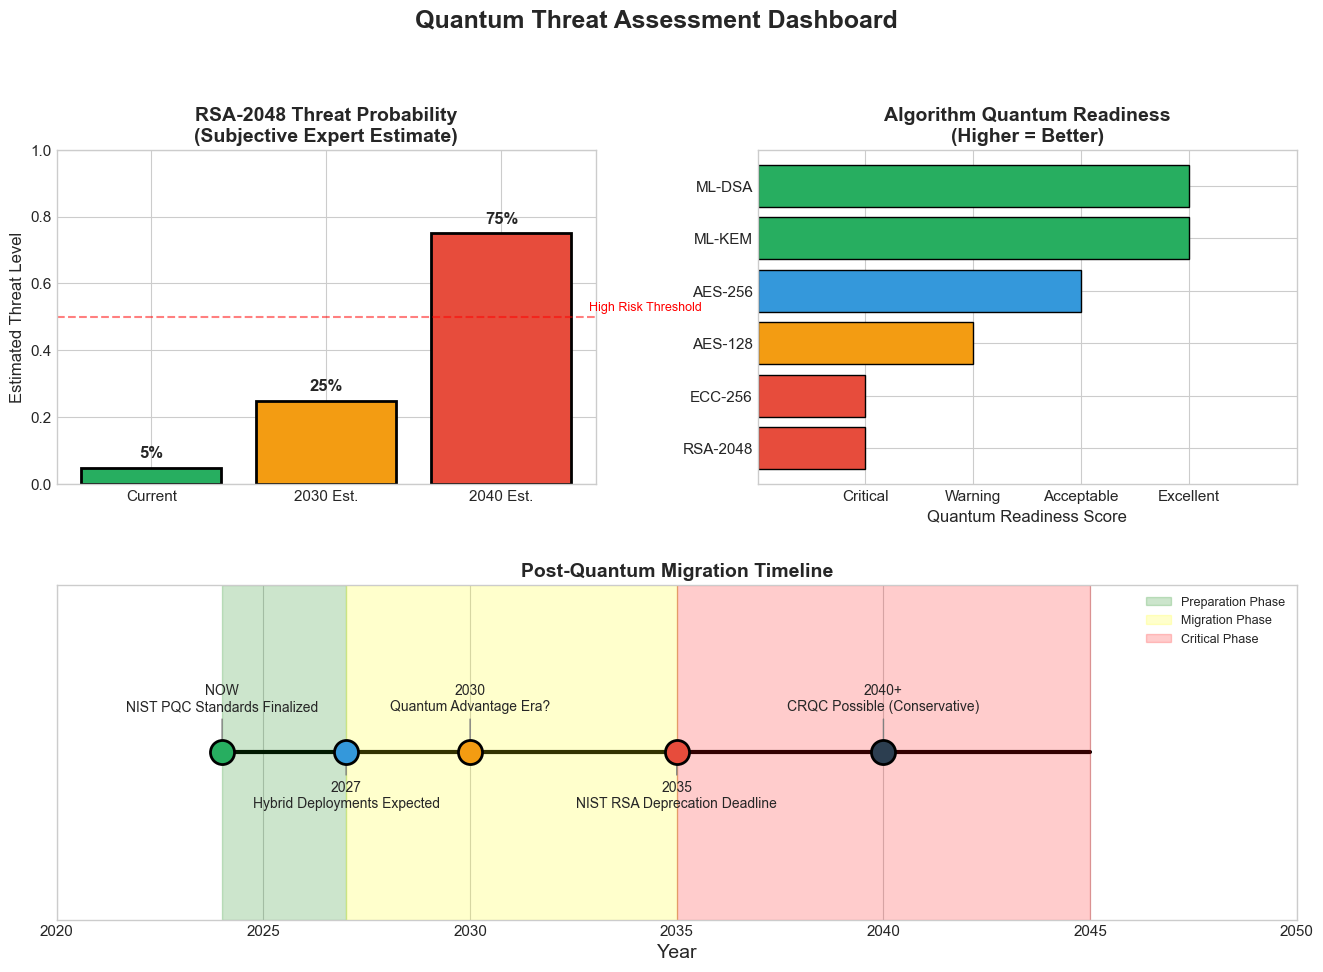


EXECUTIVE SUMMARY

    ┌────────────────────────────────────────────────────────────┐
    │                    RECOMMENDED ACTIONS                      │
    ├────────────────────────────────────────────────────────────┤
    │                                                            │
    │  [!]  IMMEDIATE (2024-2025):                                │
    │      • Inventory cryptographic assets                      │
    │      • Assess data shelf life requirements                 │
    │      • Begin PQC education and training                    │
    │                                                            │
    │   SHORT-TERM (2025-2027):                                │
    │      • Implement crypto-agility frameworks                 │
    │      • Pilot ML-KEM/ML-DSA in non-critical systems         │
    │      • Update procurement requirements                     │
    │                                                            │
    │   MEDIUM-TERM (2027-2035):          

In [5]:
def create_summary_dashboard():
    """
    Create a summary dashboard of quantum threat status.
    """
    fig = plt.figure(figsize=(16, 10))
    
    # Create grid
    gs = fig.add_gridspec(2, 2, hspace=0.3, wspace=0.3)
    
    # Panel 1: Threat Level Gauge
    ax1 = fig.add_subplot(gs[0, 0])
    threat_levels = ['Current', '2030 Est.', '2040 Est.']
    threat_values = [0.05, 0.25, 0.75]  # Subjective threat probability
    colors = [COLORS['safe'], COLORS['warning'], COLORS['critical']]
    
    bars = ax1.bar(threat_levels, threat_values, color=colors, edgecolor='black', linewidth=2)
    ax1.set_ylim(0, 1)
    ax1.set_ylabel('Estimated Threat Level', fontsize=12)
    ax1.set_title('RSA-2048 Threat Probability\n(Subjective Expert Estimate)', fontsize=14, fontweight='bold')
    ax1.axhline(y=0.5, color='red', linestyle='--', alpha=0.5)
    ax1.text(2.5, 0.52, 'High Risk Threshold', fontsize=9, color='red')
    
    for bar, val in zip(bars, threat_values):
        ax1.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.03, 
                f'{val:.0%}', ha='center', fontsize=12, fontweight='bold')
    
    # Panel 2: Algorithm Status
    ax2 = fig.add_subplot(gs[0, 1])
    algorithms = ['RSA-2048', 'ECC-256', 'AES-128', 'AES-256', 'ML-KEM', 'ML-DSA']
    status_scores = [1, 1, 2, 3, 4, 4]  # 1=Critical, 2=Warning, 3=OK, 4=Excellent
    status_colors = [COLORS['critical'], COLORS['critical'], COLORS['warning'], 
                     COLORS['info'], COLORS['safe'], COLORS['safe']]
    
    bars2 = ax2.barh(algorithms, status_scores, color=status_colors, edgecolor='black')
    ax2.set_xlim(0, 5)
    ax2.set_xlabel('Quantum Readiness Score', fontsize=12)
    ax2.set_title('Algorithm Quantum Readiness\n(Higher = Better)', fontsize=14, fontweight='bold')
    ax2.set_xticks([1, 2, 3, 4])
    ax2.set_xticklabels(['Critical', 'Warning', 'Acceptable', 'Excellent'])
    
    # Panel 3: Timeline
    ax3 = fig.add_subplot(gs[1, :])
    
    # Timeline events
    events = [
        (2024, 'NOW', 'NIST PQC Standards Finalized', COLORS['safe']),
        (2027, '2027', 'Hybrid Deployments Expected', COLORS['info']),
        (2030, '2030', 'Quantum Advantage Era?', COLORS['warning']),
        (2035, '2035', 'NIST RSA Deprecation Deadline', COLORS['critical']),
        (2040, '2040+', 'CRQC Possible (Conservative)', COLORS['dark']),
    ]
    
    for i, (year, label, desc, color) in enumerate(events):
        ax3.scatter(year, 0.5, s=300, c=color, zorder=5, edgecolor='black', linewidth=2)
        ax3.annotate(f'{label}\n{desc}', (year, 0.5), 
                    xytext=(0, 30 if i % 2 == 0 else -40),
                    textcoords='offset points', ha='center', fontsize=10,
                    arrowprops=dict(arrowstyle='->', color='gray'))
    
    ax3.plot([2024, 2045], [0.5, 0.5], 'k-', linewidth=3, zorder=1)
    ax3.set_xlim(2020, 2050)
    ax3.set_ylim(0, 1)
    ax3.set_xlabel('Year', fontsize=14)
    ax3.set_title('Post-Quantum Migration Timeline', fontsize=14, fontweight='bold')
    ax3.set_yticks([])
    ax3.axvspan(2024, 2027, alpha=0.2, color='green', label='Preparation Phase')
    ax3.axvspan(2027, 2035, alpha=0.2, color='yellow', label='Migration Phase')
    ax3.axvspan(2035, 2045, alpha=0.2, color='red', label='Critical Phase')
    ax3.legend(loc='upper right', fontsize=9)
    
    plt.suptitle('Quantum Threat Assessment Dashboard', fontsize=18, fontweight='bold', y=1.02)
    plt.tight_layout()
    plt.show()
    
    # Final recommendations
    print("\n" + "="*60)
    print("EXECUTIVE SUMMARY")
    print("="*60)
    print("""
    ┌────────────────────────────────────────────────────────────┐
    │                    RECOMMENDED ACTIONS                      │
    ├────────────────────────────────────────────────────────────┤
    │                                                            │
    │  [!]  IMMEDIATE (2024-2025):                                │
    │      • Inventory cryptographic assets                      │
    │      • Assess data shelf life requirements                 │
    │      • Begin PQC education and training                    │
    │                                                            │
    │   SHORT-TERM (2025-2027):                                │
    │      • Implement crypto-agility frameworks                 │
    │      • Pilot ML-KEM/ML-DSA in non-critical systems         │
    │      • Update procurement requirements                     │
    │                                                            │
    │   MEDIUM-TERM (2027-2035):                               │
    │      • Full production migration to PQC                    │
    │      • Re-encrypt long-lived stored data                   │
    │      • Complete deprecation of RSA/ECC for new systems     │
    │                                                            │
    └────────────────────────────────────────────────────────────┘
    """)


# =============================================================================
# SUMMARY DASHBOARD
# =============================================================================

print("="*60)
print("QUANTUM THREAT ASSESSMENT DASHBOARD")
print("="*60)

create_summary_dashboard()

---

##  References

1. Mosca, M. (2018). "Cybersecurity in an Era with Quantum Computers: Will We Be Ready?" *IEEE Security & Privacy*, 16(5), 38-41.

2. Gidney, C., & Ekerå, M. (2021). "How to factor 2048 bit RSA integers in 8 hours using 20 million noisy qubits." *Quantum*, 5, 433.

3. NIST (2024). Post-Quantum Cryptography Standardization. [FIPS 203, 204, 205](https://csrc.nist.gov/projects/post-quantum-cryptography)

4. Global Risk Institute. "Quantum Threat Timeline Report." [Annual Reports](https://globalriskinstitute.org/)

5. IBM Quantum Roadmap. [IBM Quantum Network](https://www.ibm.com/quantum)

---

## --> Next Steps

Continue to **Notebook 04: Post-Quantum Standards (NIST)** to learn:
- ML-KEM (Kyber) key encapsulation
- ML-DSA (Dilithium) digital signatures
- The Learning With Errors (LWE) problem
- Practical implementation considerations

---

*Created for educational purposes. All code is provided under MIT License.*